# Predict Health Outcomes of Horses

Thank you to everyone who participated in and contributed to Season 3 Playground Series so far!

With the same goal to give the Kaggle community a variety of fairly light-weight challenges that can be used to learn and sharpen skills in different aspects of machine learning and data science, we will continue launching the Tabular Tuesday in September every Tuesday 00:00 UTC, with each competition running for 3 weeks. Again, these will be fairly light-weight datasets that are synthetically generated from real-world data, and will provide an opportunity to quickly iterate through various model and feature engineering ideas, create visualizations, etc.

Your Goal: Given various medical indicators, predict the health outcomes of horses.

In [1]:
import pandas as pd

In [4]:
df=pd.read_csv('train.csv')

In [5]:
df

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,...,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived
1231,1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,...,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died
1232,1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,...,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived
1233,1233,yes,adult,534784,38.1,70.0,16.0,normal,reduced,bright_red,...,58.0,74.0,cloudy,2.0,yes,2209,0,0,no,lived


In [6]:
del df['id']

In [7]:
df.isnull().sum()

,0
surgery,0
age,0
hospital_number,0
rectal_temp,0
pulse,0
respiratory_rate,0
temp_of_extremities,39
peripheral_pulse,60
mucous_membrane,21
capillary_refill_time,6


In [11]:
import numpy as np

In [17]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 879.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

In [18]:
from pycaret.classification import*

In [19]:
setup(df,target='outcome')

,Description,Value
0,Session id,6146
1,Target,outcome
2,Target type,Multiclass
3,Target mapping,"died: 0, euthanized: 1, lived: 2"
4,Original data shape,"(1235, 28)"
5,Transformed data shape,"(1235, 66)"
6,Transformed train set shape,"(864, 66)"
7,Transformed test set shape,"(371, 66)"
8,Numeric features,11
9,Categorical features,16


In [20]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7143,0.8441,0.7143,0.7170,0.7131,0.5467,0.5485,1.3600
rf,Random Forest Classifier,0.6993,0.8422,0.6993,0.7076,0.6979,0.5222,0.5258,0.6170
xgboost,Extreme Gradient Boosting,0.6980,0.8416,0.6980,0.7001,0.6969,0.5222,0.5236,0.5480
et,Extra Trees Classifier,0.6933,0.8381,0.6933,0.6980,0.6890,0.5097,0.5141,0.7710
gbc,Gradient Boosting Classifier,0.6899,0.0000,0.6899,0.6911,0.6875,0.5046,0.5065,1.3620
ada,Ada Boost Classifier,0.6888,0.0000,0.6888,0.6933,0.6860,0.5033,0.5063,0.4570
lda,Linear Discriminant Analysis,0.6645,0.0000,0.6645,0.6686,0.6627,0.4673,0.4696,0.2970
ridge,Ridge Classifier,0.6610,0.0000,0.6610,0.6643,0.6579,0.4569,0.4595,0.2910
lr,Logistic Regression,0.6183,0.0000,0.6183,0.6232,0.6087,0.3782,0.3844,2.3530
knn,K Neighbors Classifier,0.6100,0.7573,0.6100,0.6194,0.6111,0.3896,0.3924,0.3110


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6146, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [36]:
df.isnull().sum()

,0
surgery,0
age,0
hospital_number,0
rectal_temp,0
pulse,0
respiratory_rate,0
temp_of_extremities,39
peripheral_pulse,60
mucous_membrane,21
capillary_refill_time,6


In [21]:
df.head(3)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived


In [31]:
df['nasogastric_reflux'].value_counts()

,count
nasogastric_reflux,
more_1_liter,604
none,331
less_1_liter,278
slight,1


In [23]:
df['abdomo_appearance'].fillna(1,inplace=True)

In [26]:
df['abdomen'].fillna(1,inplace=True)

In [29]:
df['rectal_exam_feces'].fillna(1,inplace=True)

In [32]:
df['nasogastric_reflux'].fillna(1,inplace=True)

In [34]:
df['nasogastric_tube'].fillna(1,inplace=True)

In [35]:
df['abdominal_distention'].fillna(1,inplace=True)

In [38]:
df['temp_of_extremities'].fillna(1,inplace=True)

In [39]:
df['mucous_membrane'].fillna(1,inplace=True)

In [40]:
df['capillary_refill_time'].fillna(1,inplace=True)

In [41]:
df['pain'].fillna(1,inplace=True)

In [43]:
df['peristalsis'].fillna(1,inplace=True)

In [44]:
df['peripheral_pulse'].fillna(1,inplace=True)

In [53]:
df['peripheral_pulse'].value_counts()

,count
peripheral_pulse,
reduced,724
normal,429
1,60
absent,18
increased,4


In [48]:
d={'yes':1, 'no':0}
df['surgery']=df['surgery'].map(d)

In [51]:
d={'adult':1, 'young':0}
df['age']=df['age'].map(d)

In [54]:
setup(df,target='outcome')

,Description,Value
0,Session id,708
1,Target,outcome
2,Target type,Multiclass
3,Target mapping,"died: 0, euthanized: 1, lived: 2"
4,Original data shape,"(1235, 28)"
5,Transformed data shape,"(1235, 78)"
6,Transformed train set shape,"(864, 78)"
7,Transformed test set shape,"(371, 78)"
8,Numeric features,13
9,Categorical features,14


In [55]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7037,0.8401,0.7037,0.7114,0.7030,0.5289,0.5318,1.6700
rf,Random Forest Classifier,0.6968,0.8341,0.6968,0.7062,0.6953,0.5162,0.5207,0.7780
xgboost,Extreme Gradient Boosting,0.6968,0.8336,0.6968,0.7012,0.6946,0.5152,0.5181,0.5520
gbc,Gradient Boosting Classifier,0.6909,0.0000,0.6909,0.6935,0.6876,0.5054,0.5084,1.4460
et,Extra Trees Classifier,0.6898,0.8351,0.6898,0.6932,0.6847,0.5006,0.5047,0.8460
ada,Ada Boost Classifier,0.6656,0.0000,0.6656,0.6708,0.6618,0.4651,0.4700,0.4530
ridge,Ridge Classifier,0.6587,0.0000,0.6587,0.6585,0.6548,0.4536,0.4560,0.2800
lda,Linear Discriminant Analysis,0.6586,0.0000,0.6586,0.6594,0.6561,0.4570,0.4590,0.2830
knn,K Neighbors Classifier,0.5869,0.7263,0.5869,0.6011,0.5875,0.3518,0.3557,0.3130
lr,Logistic Regression,0.5730,0.0000,0.5730,0.5765,0.5701,0.3167,0.3197,1.7030


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=708, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [57]:
x=df.drop('outcome', axis=1)
y=df[["outcome"]]

In [58]:
x=pd.get_dummies(x,drop_first=True)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Örnek eğitim verisi oluşturma
X_train = np.random.rand(1000, 67)  # 1000 örnek, 67 özellik
y_train = np.random.randint(0, 2, size=(1000, 1))  # İki sınıflı hedef değişken

# input_shape'i tanımlama
input_shape = X_train.shape[1]  # Özellik sayısı (67)

# Modeli oluşturma
model = Sequential()
model.add(Dense(2, activation='relu', input_shape=(input_shape,)))  # input_shape'i uygun şekilde ayarlayın
model.add(Dense(1, activation='sigmoid'))  # Çıkış katmanı

# Modeli derleme
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modeli eğitme
history = model.fit(X_train, y_train, epochs=1000, validation_split=0.2, batch_size=32, verbose=1)

Epoch 1/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5194 - loss: 0.6943 - val_accuracy: 0.5150 - val_loss: 0.6902
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5071 - loss: 0.6915 - val_accuracy: 0.5200 - val_loss: 0.6900
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5040 - loss: 0.6891 - val_accuracy: 0.5700 - val_loss: 0.6903
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5208 - loss: 0.6884 - val_accuracy: 0.5700 - val_loss: 0.6901
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5426 - loss: 0.6869 - val_accuracy: 0.6100 - val_loss: 0.6902
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5379 - loss: 0.6869 - val_accuracy: 0.6100 - val_loss: 0.6902
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5389 - loss: 0.6874 - val_accuracy: 0.6400 - val_loss: 0.6899
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5227 - loss: 0.6856 - val_accuracy: 0

In [ ]:
import matplotlib.pyplot as plt

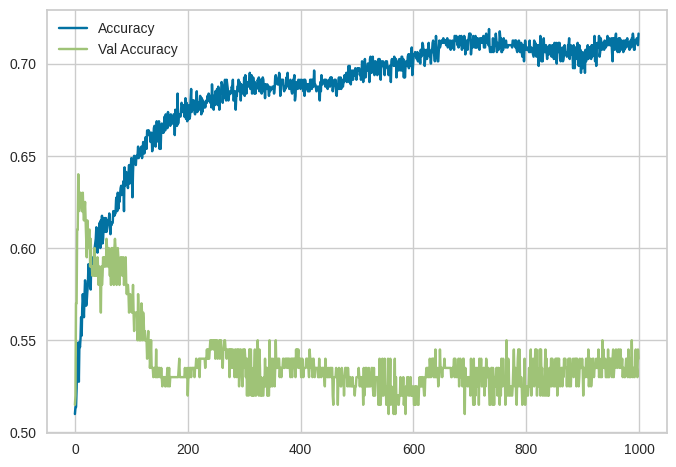

In [68]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val Accuracy')
plt.legend()

modelimiz yüzde yetmiş üzerine çıkmadı.